In [1]:
import pandas     # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt

cufflinks.go_offline()

In [ ]:
# Import a dataset of advertising spends
df = pandas.read_csv('Real estate.csv', index_col=0)

# Display the first five rows of the data
df.head()

<AxesSubplot:xlabel='X2age', ylabel='Yhouseprice'>

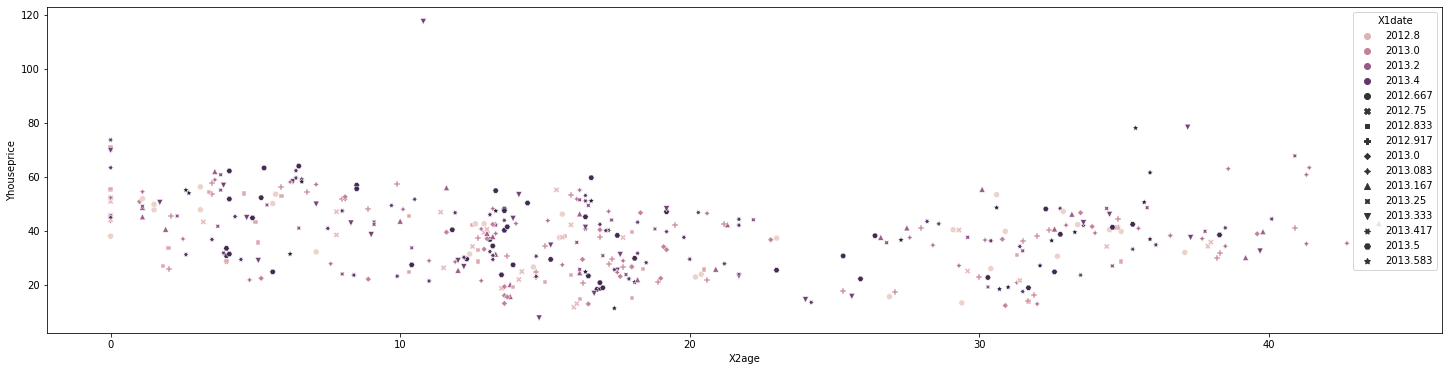

In [9]:
plt.figure(figsize=(25, 6))
seaborn.scatterplot(data=df, x='X2age', y='Yhouseprice', hue="X1date", style="X1date")

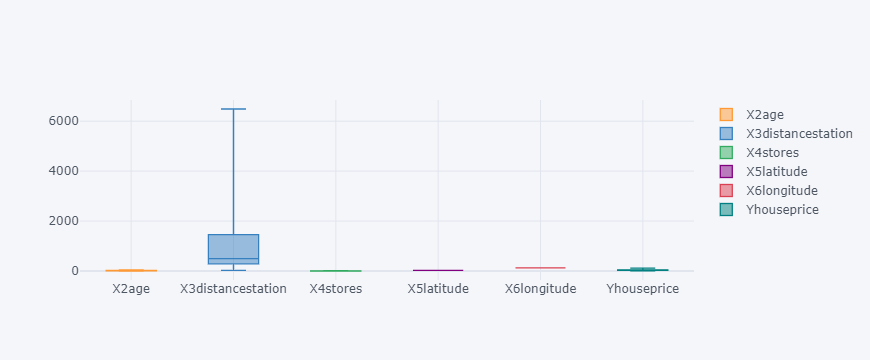

In [10]:
df.iplot(kind='box')

In [11]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['X2age', 'X3distancestation', 'X4stores', 'X5latitude', 'X6longitude']
X = df[predictors]
y = df['Yhouseprice']

# Initialise and fit model
lm = LinearRegression()
model_real_estate = lm.fit(X, y)

In [12]:
# We can examine the model coefficients
print(f'alpha = {model_real_estate.intercept_}')
print(f'betas = {model_real_estate.coef_}')

alpha = -4945.595113742848
betas = [-2.68916833e-01 -4.25908898e-03  1.16302048e+00  2.37767191e+02
 -7.80545273e+00]


In [13]:
from sklearn.model_selection import train_test_split

# Divide the data 80-20 into a training and test set
train, test = train_test_split(df, test_size=0.2)

In [14]:
# Build linear regression model on the training data using all predictors
predictors = ['X2age', 'X3distancestation', 'X4stores', 'X5latitude', 'X6longitude']
X = train[predictors]
y = train['Yhouseprice']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y)

In [15]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictors])

<AxesSubplot:xlabel='predictions', ylabel='Yhouseprice'>

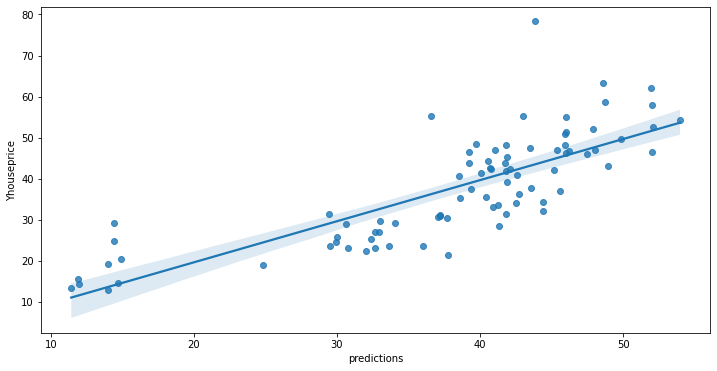

In [16]:
plt.figure(figsize=(12, 6))
seaborn.regplot(y='Yhouseprice', x='predictions', data=test)

In [20]:
r_squared = model_All.score(test[predictors], test["Yhouseprice"])
print(f'Model R²: {r_squared:.2f}')

Model R²: 0.63
